In [1]:
# Using pandas to process data
import numpy as np
import pandas as pd
import datetime

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

from data_util import parse_bj_aq_data, plot_station, plot_stations

from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# 数据解析

In [2]:
bj_aq_data, stations, bj_aq_stations = parse_bj_aq_data()

NaN in PM2.5 is 23459, 6.508615 %
NaN in PM10 is 96175, 26.683406 %
NaN in NO2 is 21720, 6.026135 %
NaN in CO is 46144, 12.802486 %
NaN in O3 is 23732, 6.584358 %
NaN in SO2 is 21664, 6.010598 %
There are 35 air quality stations in Beijing

The stations in Beijing are:
 {'wanshouxigong_aq', 'donggaocun_aq', 'guanyuan_aq', 'dongsihuan_aq', 'qianmen_aq', 'miyunshuiku_aq', 'wanliu_aq', 'yungang_aq', 'nansanhuan_aq', 'zhiwuyuan_aq', 'yanqin_aq', 'dingling_aq', 'fengtaihuayuan_aq', 'nongzhanguan_aq', 'xizhimenbei_aq', 'tiantan_aq', 'huairou_aq', 'mentougou_aq', 'yongdingmennei_aq', 'gucheng_aq', 'yufa_aq', 'dongsi_aq', 'shunyi_aq', 'beibuxinqu_aq', 'pinggu_aq', 'daxing_aq', 'aotizhongxin_aq', 'fangshan_aq', 'tongzhou_aq', 'pingchang_aq', 'yizhuang_aq', 'yongledian_aq', 'miyun_aq', 'badaling_aq', 'liulihe_aq'}


In [3]:
bj_aq_stations["fangshan_aq"]

,stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2
format_time,,,,,,,,
2017-01-01 14:00:00,fangshan_aq,2017-01-01 14:00:00,399.0,472.0,136.0,6.3,4.0,10.0
2017-01-01 15:00:00,fangshan_aq,2017-01-01 15:00:00,397.0,485.0,126.0,6.4,4.0,10.0
2017-01-01 16:00:00,fangshan_aq,2017-01-01 16:00:00,429.0,520.0,124.0,6.7,4.0,9.0
2017-01-01 17:00:00,fangshan_aq,2017-01-01 17:00:00,441.0,505.0,127.0,6.7,4.0,10.0
2017-01-01 18:00:00,fangshan_aq,2017-01-01 18:00:00,438.0,485.0,127.0,6.7,4.0,9.0
2017-01-01 19:00:00,fangshan_aq,2017-01-01 19:00:00,406.0,NaN,122.0,6.6,4.0,11.0
2017-01-01 20:00:00,fangshan_aq,2017-01-01 20:00:00,409.0,415.0,120.0,7.1,NaN,6.0
2017-01-01 21:00:00,fangshan_aq,2017-01-01 21:00:00,410.0,NaN,114.0,0.7,4.0,5.0
2017-01-01 22:00:00,fangshan_aq,2017-01-01 22:00:00,398.0,NaN,117.0,7.2,4.0,4.0


# 可视化

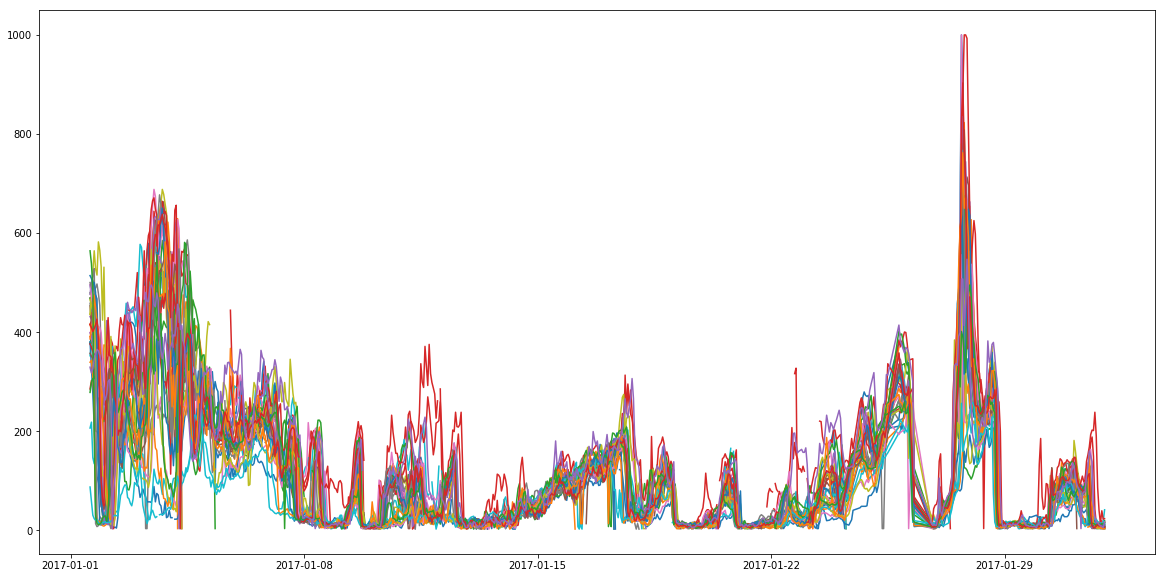

In [4]:
plot_stations(bj_aq_stations, "PM2.5", datetime.datetime(2017,1,1), datetime.datetime(2017,2,1))